In [1]:
!pip install catboost 

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor


%matplotlib inline

In [60]:
iris = sns.load_dataset('iris')

In [4]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris.head() # четыре признака: sepal_length, sepal_width, petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
pd.unique(iris.species) # классы, которые нужно предсказать


array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Задание 1
Преобразуйте метки классов колонки species в численный вид. Просмотрите датасет, постройте графики (гистограммы, зависимости) и очистите его от дубликатов и пустых строк, если таковые имеются.

In [31]:
# Первым делом представим строковые данные как числовые
import sklearn.preprocessing as preprocessing

number_iris = pd.get_dummies(iris)
print(number_iris.count())
number_iris
#пустых строк не наблюдаю


sepal_length          150
sepal_width           150
petal_length          150
petal_width           150
species_setosa        150
species_versicolor    150
species_virginica     150
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


In [8]:
#удаляем дубликаты, делаем вывод что был всего один повтор данных, было 150 строк, стало 149
drop_duplicates_iris = number_iris.drop_duplicates()
print(drop_duplicates_iris.count())
drop_duplicates_iris.head(20)

sepal_length          149
sepal_width           149
petal_length          149
petal_width           149
species_setosa        149
species_versicolor    149
species_virginica     149
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


Посмотрим распределение по видам

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


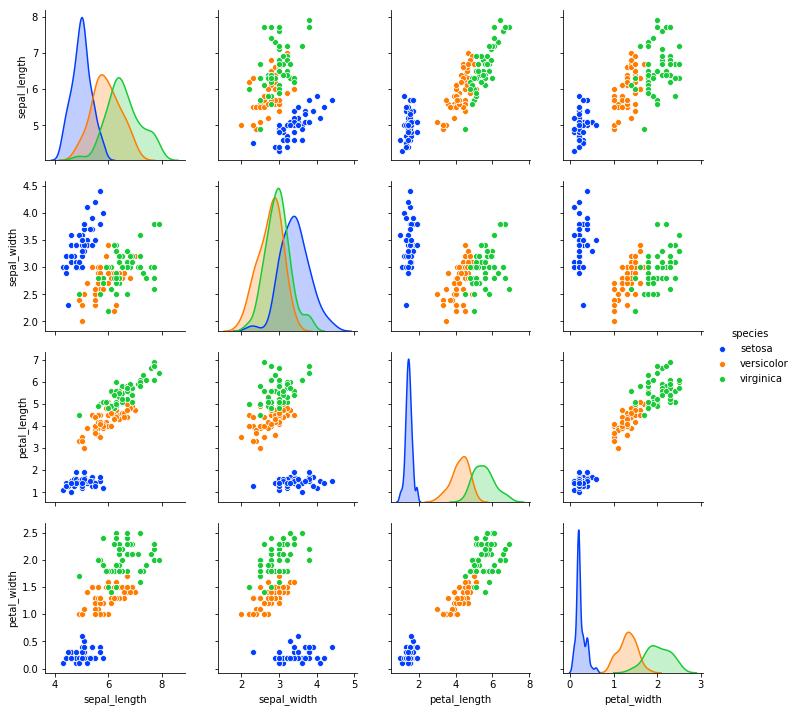

In [9]:


sns.pairplot(iris, hue="species",palette="bright")
plt.show()

Гистограма показывает, как три вида ириса различаются на основе четырех признаков. 

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


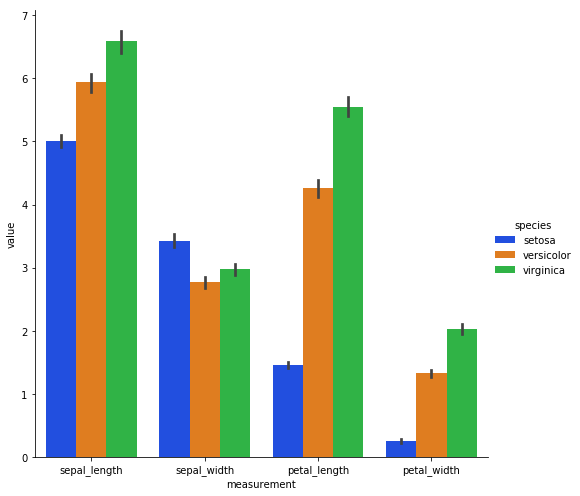

In [10]:

piris = pd.melt(iris, "species", var_name="measurement") 
sns.factorplot(x="measurement", y="value", hue="species", data=piris, size=7, kind="bar",palette="bright") 
plt.show() 


# Построим гистограмы распределения


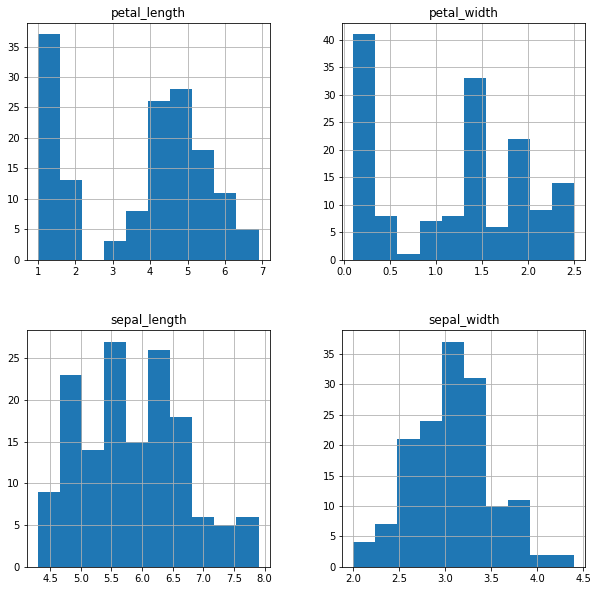

In [84]:

#распределения количественных признаков
features = list(set(drop_duplicates_iris.columns)-set(['species_setosa', 'species_versicolor', 'species_virginica']))
drop_duplicates_iris[features].hist(figsize=(10,10));

### Задание 2
Получите новые бинарные признаки, например: постройте график зависимости iris.sepal_length от iris.sepal_width и окрасьте точки в зависимости от iris.species. Мы видим, что один класс можно легко выделить, если взять iris.sepal_length < 6 и iris.sepal_width > 3. Создайте 5 бинарных признаков.

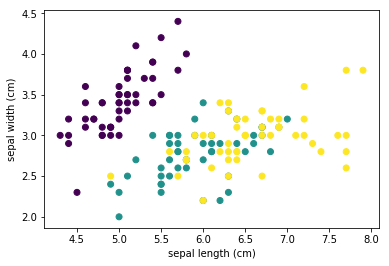

In [45]:
from sklearn import datasets
# Загружаем набор данных
iris = datasets.load_iris()
 

# Разделение набора данных
x_axis = iris.data[:, 0]  # Чашелистик длина
y_axis = iris.data[:, 1]  # Чашелистик ширина
 
# Построение
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris.target)
plt.show()

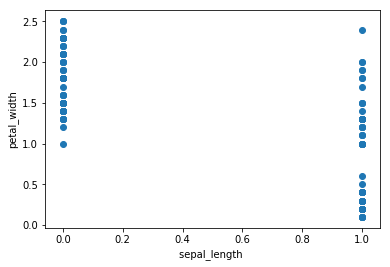

In [63]:
feature_sep_l = np.zeros(number_iris.shape[0])
feature_sep_l[np.where(number_iris.sepal_length < 6)] = 1

x_data = feature_sep_l
y_data = iris.petal_width
plt.xlabel('sepal_length ')
plt.ylabel('petal_width')
plt.scatter(x_data, y_data)
plt.show()

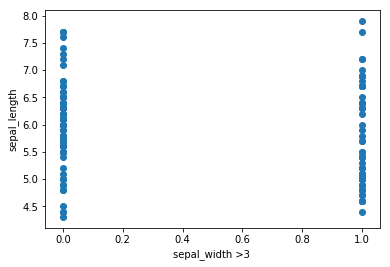

In [70]:
feature_sep_l = np.zeros(number_iris.shape[0])
feature_sep_l[np.where(number_iris.sepal_width >3)] = 1

x_data = feature_sep_l
y_data = iris.sepal_length
plt.xlabel('sepal_width >3 ')
plt.ylabel('sepal_length')
plt.scatter(x_data, y_data)
plt.show()

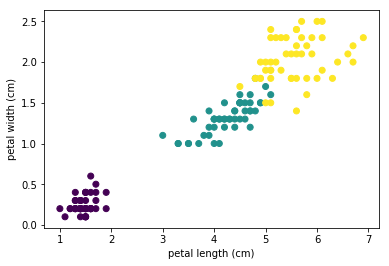

In [12]:
# Разделение набора данных
x_axis = iris.data[:, 2]  # Чашелистик длина
y_axis = iris.data[:, 3]  # Чашелистик ширина
 
# Построение
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.scatter(x_axis, y_axis, c=iris.target)
plt.show()

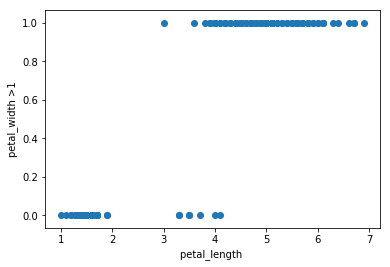

In [72]:
feature_sep_l = np.zeros(number_iris.shape[0])
feature_sep_l[np.where(number_iris.petal_width >1)] = 1

x_data = iris.petal_length
y_data = feature_sep_l
plt.xlabel('petal_length ')
plt.ylabel('petal_width >1')
plt.scatter(x_data, y_data)
plt.show()

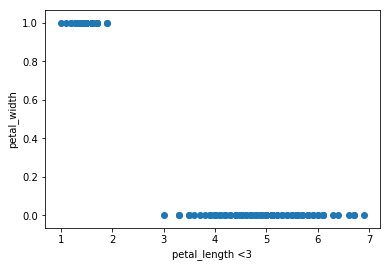

In [73]:
feature_sep_l = np.zeros(number_iris.shape[0])
feature_sep_l[np.where(number_iris.petal_length <3)] = 1

x_data = iris.petal_length
y_data = feature_sep_l
plt.xlabel('petal_length <3')
plt.ylabel('petal_width')
plt.scatter(x_data, y_data)
plt.show()

### Задание 3
По ссылке https://catboost.ai/docs/concepts/python-usages-examples.html изучите возможности применения catboost.
* Создайте модель Catboost.Classifier
* Перемешайте данные
* Отберите 10 % данных для валидации
* Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков 
* Выберите функцию ошибки для данной задачи, объясните свой выбор
* Обучите модель и оцените ошибку на валидационных данных, объясните результат

# Создаем модель CatBoostClassifier

In [49]:
import catboost
from catboost import CatBoostClassifier
cls = catboost.CatBoostClassifier(loss_function='MultiClass')

cls.fit(iris.data, iris.target)

# Save model to catboost format
cls.save_model("iris.mlmodel", format="coreml", export_parameters={'prediction_type': 'probability'})

0:	learn: -1.0571453	total: 48.4ms	remaining: 48.4s
1:	learn: -1.0253734	total: 72.3ms	remaining: 36.1s
2:	learn: -0.9943168	total: 98.6ms	remaining: 32.8s
3:	learn: -0.9619947	total: 121ms	remaining: 30.2s
4:	learn: -0.9349442	total: 146ms	remaining: 29s
5:	learn: -0.9074849	total: 171ms	remaining: 28.3s
6:	learn: -0.8804875	total: 195ms	remaining: 27.7s
7:	learn: -0.8565491	total: 218ms	remaining: 27.1s
8:	learn: -0.8287516	total: 233ms	remaining: 25.6s
9:	learn: -0.8032069	total: 257ms	remaining: 25.5s
10:	learn: -0.7787833	total: 280ms	remaining: 25.2s
11:	learn: -0.7571021	total: 305ms	remaining: 25.1s
12:	learn: -0.7344302	total: 327ms	remaining: 24.8s
13:	learn: -0.7150964	total: 349ms	remaining: 24.6s
14:	learn: -0.6953170	total: 373ms	remaining: 24.5s
15:	learn: -0.6768361	total: 397ms	remaining: 24.4s
16:	learn: -0.6608039	total: 421ms	remaining: 24.4s
17:	learn: -0.6437625	total: 446ms	remaining: 24.3s
18:	learn: -0.6268943	total: 471ms	remaining: 24.3s
19:	learn: -0.6121546

# перемешиваем данные _train и берем 10% от валидации _val

In [46]:
from sklearn.model_selection import train_test_split
iris_x = iris['data']
iris_y = iris['target']

iris_train_x, iris_val_x,iris_train_y, iris_val_y = train_test_split(iris_x, iris_y, shuffle=True, test_size=0.1)

In [53]:
from catboost import Pool

train_pool = Pool(iris_train_x, 
                  iris_train_y)
validate_pool = Pool(iris_val_x, 
                     iris_val_y)

models = []
for i in range(5):
    model = CatBoostClassifier(iterations=100, 
                               random_seed=i)
    model.fit(train_pool, 
              eval_set=validate_pool)



Learning rate set to 0.169409
0:	learn: 0.4276547	test: 0.4289304	best: 0.4289304 (0)	total: 105ms	remaining: 10.4s
1:	learn: 0.2683951	test: 0.2760524	best: 0.2760524 (1)	total: 138ms	remaining: 6.75s
2:	learn: 0.1647092	test: 0.1730380	best: 0.1730380 (2)	total: 167ms	remaining: 5.4s
3:	learn: 0.1099868	test: 0.1215513	best: 0.1215513 (3)	total: 192ms	remaining: 4.62s
4:	learn: 0.0715042	test: 0.0854702	best: 0.0854702 (4)	total: 216ms	remaining: 4.11s
5:	learn: 0.0474204	test: 0.0554496	best: 0.0554496 (5)	total: 235ms	remaining: 3.68s
6:	learn: 0.0368576	test: 0.0451001	best: 0.0451001 (6)	total: 268ms	remaining: 3.56s
7:	learn: 0.0266817	test: 0.0317741	best: 0.0317741 (7)	total: 292ms	remaining: 3.36s
8:	learn: 0.0227035	test: 0.0261492	best: 0.0261492 (8)	total: 329ms	remaining: 3.32s
9:	learn: 0.0193327	test: 0.0220053	best: 0.0220053 (9)	total: 356ms	remaining: 3.21s
10:	learn: 0.0162299	test: 0.0181976	best: 0.0181976 (10)	total: 379ms	remaining: 3.07s
11:	learn: 0.0146034	te

# Выбрали функцию ошибки MultiClass и обучаем модель на валидационных данных

In [58]:
#iris = sklearn.datasets.load_iris()
cls = catboost.CatBoostClassifier(loss_function='MultiClass')

cls.fit(validate_pool)
              


0:	learn: -1.0844198	total: 41.5ms	remaining: 41.5s
1:	learn: -1.0704460	total: 62.1ms	remaining: 31s
2:	learn: -1.0604827	total: 81.2ms	remaining: 27s
3:	learn: -1.0486417	total: 90.7ms	remaining: 22.6s
4:	learn: -1.0352624	total: 105ms	remaining: 21s
5:	learn: -1.0278303	total: 123ms	remaining: 20.4s
6:	learn: -1.0205081	total: 139ms	remaining: 19.7s
7:	learn: -1.0095107	total: 151ms	remaining: 18.7s
8:	learn: -0.9967205	total: 161ms	remaining: 17.7s
9:	learn: -0.9881674	total: 176ms	remaining: 17.4s
10:	learn: -0.9767996	total: 195ms	remaining: 17.5s
11:	learn: -0.9663440	total: 204ms	remaining: 16.8s
12:	learn: -0.9592755	total: 226ms	remaining: 17.1s
13:	learn: -0.9499041	total: 241ms	remaining: 17s
14:	learn: -0.9414194	total: 260ms	remaining: 17s
15:	learn: -0.9338732	total: 275ms	remaining: 16.9s
16:	learn: -0.9269988	total: 290ms	remaining: 16.8s
17:	learn: -0.9163381	total: 302ms	remaining: 16.5s
18:	learn: -0.9047555	total: 321ms	remaining: 16.6s
19:	learn: -0.8986184	total: